In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow log quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_size = X_train.shape[1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape, image_size

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), 28)

In [3]:
X_train = X_train.reshape(X_train.shape[0], image_size ** 2).astype('float32')
X_test = X_test.reshape(X_test.shape[0], image_size ** 2).astype('float32')

X_train /= 255
X_test /= 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [4]:
y_train_ec = np_utils.to_categorical(y_train, 10)
y_test_ec = np_utils.to_categorical(y_test, 10)
y_train_ec.shape, y_test_ec.shape

((60000, 10), (10000, 10))

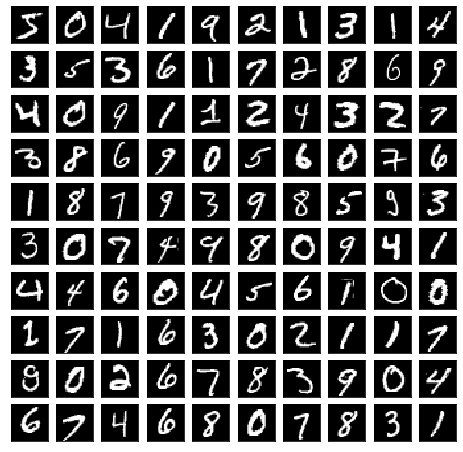

In [5]:
plt.figure(figsize=(8,8))
for index, (image, label) in enumerate(zip(X_train[:100], y_train[:100])):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image.reshape(image_size,image_size), cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

In [37]:
model = Sequential()
model.add(Dense(512, input_shape=(image_size ** 2,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [38]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [39]:
history = model.fit(X_train, y_train_ec,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, y_test_ec))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.3205 - accuracy: 0.9049 - val_loss: 0.1237 - val_accuracy: 0.9624
Epoch 2/10
 - 2s - loss: 0.1315 - accuracy: 0.9610 - val_loss: 0.0898 - val_accuracy: 0.9717
Epoch 3/10
 - 2s - loss: 0.0937 - accuracy: 0.9726 - val_loss: 0.0722 - val_accuracy: 0.9775
Epoch 4/10
 - 2s - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9777
Epoch 5/10
 - 2s - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0616 - val_accuracy: 0.9824
Epoch 6/10
 - 2s - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0638 - val_accuracy: 0.9827
Epoch 7/10
 - 2s - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0629 - val_accuracy: 0.9806
Epoch 8/10
 - 2s - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0619 - val_accuracy: 0.9815
Epoch 9/10
 - 2s - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 10/10
 - 2s - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0584 - val_accuracy: 0.9827


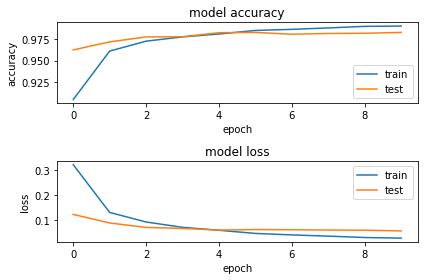

In [40]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [41]:
loss, precision = model.evaluate(X_test, y_test_ec, verbose=2)

print("Loss: {:.3f} \nPrecision: {:.3f}".format(loss, precision))

Loss: 0.058 
Precision: 0.983


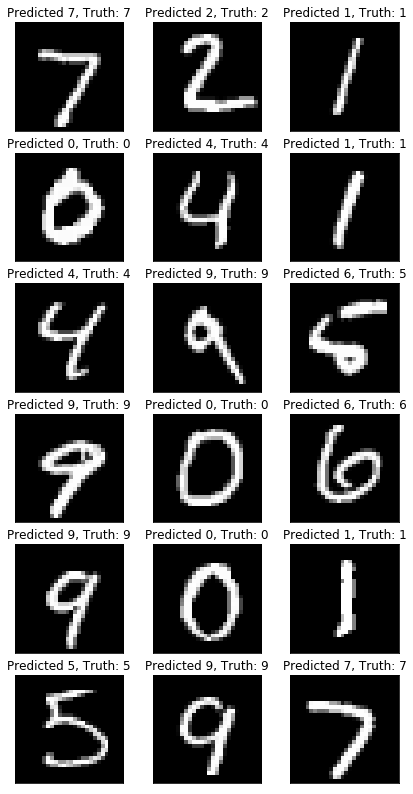

In [42]:
y_test_pred = model.predict_classes(X_test)

plt.figure(figsize=(7,14))
for index, (image,) in enumerate(zip(X_test[:18])):
    plt.subplot(6, 3, index + 1)
    plt.imshow(image.reshape(image_size,image_size), cmap=plt.cm.gray)
    plt.title(
      "Predicted {}, Truth: {}".format(y_test_pred[index], 
                                       y_test[index]))
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

Text(0.5, 1, 'Confusion matrix')

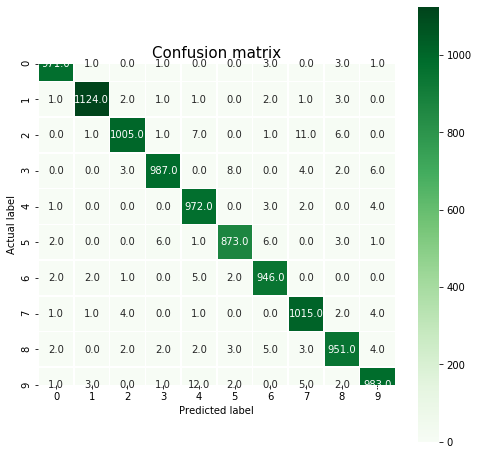

In [43]:
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix", size = 15)